In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('../../Data/training_data.csv')

C:\Users\CrazE\AppData\Local\Temp\ipykernel_13868\626279252.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../Data/training_data.csv')


## Data Preprocessing

### Clean Data

Check for number of null values, unique values, and data types

In [3]:
df.isnull().sum()

Customer                                   0
clli                                       0
year                                       0
month                                      0
day                                        0
date                                       0
rack                                       0
shelf                                      0
slot                                       0
port                                       0
ont                                        0
objectName                                 0
berDownstream                          35763
berUpstream                                3
objectType                                 0
networkRxLevel                         10354
modelRxLevel                               0
modemTxLevel                             107
distance                                 366
opticalTemperature                         1
opticalVoltage                             0
modemType                                 87
status    

In [4]:
df.nunique()

Customer                               2448
clli                                   1015
year                                      1
month                                     1
day                                      31
date                                     31
rack                                      1
shelf                                     1
slot                                     18
port                                     16
ont                                      59
objectName                             2672
berDownstream                           249
berUpstream                            3855
objectType                                1
networkRxLevel                          255
modelRxLevel                           4238
modemTxLevel                           3063
distance                                198
opticalTemperature                      655
opticalVoltage                           21
modemType                                 8
status                          

In [5]:
df.dtypes

Customer                                 int64
clli                                    object
year                                     int64
month                                    int64
day                                      int64
date                                    object
rack                                     int64
shelf                                    int64
slot                                     int64
port                                     int64
ont                                      int64
objectName                              object
berDownstream                          float64
berUpstream                            float64
objectType                              object
networkRxLevel                         float64
modelRxLevel                           float64
modemTxLevel                           float64
distance                               float64
opticalTemperature                     float64
opticalVoltage                         float64
modemType    

Try to further identify which data might be troublesome to work with

<Axes: xlabel='modemType', ylabel='Count'>

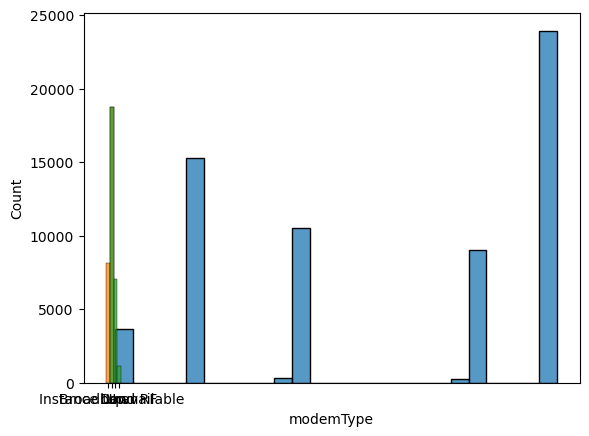

In [6]:
sns.histplot(data=df, x='modemType')
sns.histplot(data=df, x='videoAniAgcModePlanned')
sns.histplot(data=df, x='videoAniOperState')

Drop data that is unnecessary, has low unique counts, and too many null values

In [7]:
# Drop some data that is unnecessary or has one unique value
df = df.drop(['clli', 'year', 'month', 'date', 'rack', 'shelf', 'objectType', 'Stops_null', 'Stops_NAS-Error', 'Stops_Port-Error', 'Stops_Service-Unavailable', 'Stops_User-Error'], axis=1)
# Drop some data that has too many null values ( > 60000)
df = df.drop(['Stops_Admin-Reset', 'Stops_Idle-Timeout', 'Stops_Lost-Carrier', 'Stops_Lost-Service', 'Stops_NAS-Request', 'Stops_Session-Timeout', 'Stops_User-Request', 'INTENT', 'CALLCOMPLETIONREASON', 'TSO_calls_count', 'REPORT_DATE'], axis=1)
# Drop some data that has too many null values ( > 50000)
df = df.drop(['videoAniAgcSetting', 'videoAniOpInfoOpticalSignalLevel', 'videoAniOpInfoOpticalSignalLevelDbm', 'videoAniOpInfoRfPowerLevel'], axis=1)
# Drop some data that may be too hard to work with (for example: low unique)
df = df.drop(['modemType', 'laserBiasThreshold', 'status', 'ranged', 'videoAniAgcModePlanned', 'videoAniOperState', 'score'], axis=1)

In [8]:
df.isnull().sum()

Customer                  0
day                       0
slot                      0
port                      0
ont                       0
objectName                0
berDownstream         35763
berUpstream               3
networkRxLevel        10354
modelRxLevel              0
modemTxLevel            107
distance                366
opticalTemperature        1
opticalVoltage            0
laserBiasCurrent      26946
speedProfile              0
alarms                    0
Alarm_SECS                0
Session_SECS              0
total_stops               0
SA_TSO                    0
service_repair        61691
TMAX                   1179
TMIN                   1094
PRCP                    565
SNOW                  38720
dtype: int64

We have relevant columns now. We can likely fill in missing values with the median value.

In [9]:
df['berDownstream'] = df['berDownstream'].fillna(df['berDownstream'].median())
df['berUpstream'] = df['berUpstream'].fillna(df['berUpstream'].median())
df['networkRxLevel'] = df['networkRxLevel'].fillna(df['networkRxLevel'].median())
df['modemTxLevel'] = df['modemTxLevel'].fillna(df['modemTxLevel'].median())
df['distance'] = df['distance'].fillna(df['distance'].median())
df['laserBiasCurrent'] = pd.to_numeric(df['laserBiasCurrent'],errors = 'coerce')
df['laserBiasCurrent'] = df['laserBiasCurrent'].fillna(df['laserBiasCurrent'].median())
df['opticalTemperature'] = df['opticalTemperature'].fillna(df['opticalTemperature'].median())
df['service_repair'] = df['service_repair'].fillna(0)


# One hot encoding
labelencoder = LabelEncoder()
df['speedProfile'] = labelencoder.fit_transform(df['speedProfile'])
df['objectName'] = labelencoder.fit_transform(df['objectName'])

In [10]:
df.isnull().sum()

Customer                  0
day                       0
slot                      0
port                      0
ont                       0
objectName                0
berDownstream             0
berUpstream               0
networkRxLevel            0
modelRxLevel              0
modemTxLevel              0
distance                  0
opticalTemperature        0
opticalVoltage            0
laserBiasCurrent          0
speedProfile              0
alarms                    0
Alarm_SECS                0
Session_SECS              0
total_stops               0
SA_TSO                    0
service_repair            0
TMAX                   1179
TMIN                   1094
PRCP                    565
SNOW                  38720
dtype: int64

In [11]:
n = df.nunique(axis=0)
print(n)

Customer              2448
day                     31
slot                    18
port                    16
ont                     59
objectName            2672
berDownstream          249
berUpstream           3855
networkRxLevel         255
modelRxLevel          4238
modemTxLevel          3063
distance               198
opticalTemperature     655
opticalVoltage          21
laserBiasCurrent       909
speedProfile            30
alarms                 114
Alarm_SECS             531
Session_SECS          3958
total_stops             60
SA_TSO                   7
service_repair           2
TMAX                    96
TMIN                    87
PRCP                   207
SNOW                     1
dtype: int64


Now that our data does not have null values (except for environment data), check if we can find any relationship between numeric data and service_repair.

In [12]:
# check for correlation after removing null values from numeric types
import warnings
warnings.filterwarnings('ignore')
for i in df.columns:
        tempdf = df[[i, 'service_repair']]
        if(tempdf.dtypes[0] == 'object'):
            continue;
        tempdf.dropna(inplace=True)
        print(i, tempdf.corr().iloc[0,1])

Customer -0.013848561509524742
day 0.03182666159485242
slot -0.0011622402014524237
port 0.001106672015921504
ont -0.0030361996358431982
objectName 0.00549761266828808
berDownstream 0.020910498285342204
berUpstream 0.011340254656154394
networkRxLevel -0.0032562828325130347
modelRxLevel -0.004548422206127344
modemTxLevel -0.0034791268689406568
distance -0.0007110765643655743
opticalTemperature -0.004710328592829931
opticalVoltage 0.0034234704143573905
laserBiasCurrent -0.0032040510883129068
speedProfile -0.0009730180032671344
alarms 0.006956750408721844
Alarm_SECS -0.0004754465963273949
Session_SECS -0.09432207347259942
total_stops 0.015636966024633003
SA_TSO 0.06905148045494691
service_repair 1.0
TMAX 0.0013085432647492478
TMIN -0.007877290928851031
PRCP 0.0001483194534181364
SNOW nan


In [ ]:
df = pd.read_csv('../../Data/test_data.csv')
# Drop some data that is unnecessary or has one unique value
df = df.drop(['clli', 'year', 'month', 'date', 'rack', 'shelf', 'objectType', 'Stops_null', 'Stops_NAS-Error', 'Stops_Port-Error', 'Stops_Service-Unavailable', 'Stops_User-Error'], axis=1)
# Drop some data that has too many null values ( > 60000)
df = df.drop(['Stops_Admin-Reset', 'Stops_Idle-Timeout', 'Stops_Lost-Carrier', 'Stops_Lost-Service', 'Stops_NAS-Request', 'Stops_Session-Timeout', 'Stops_User-Request', 'INTENT', 'CALLCOMPLETIONREASON', 'TSO_calls_count', 'REPORT_DATE'], axis=1)
# Drop some data that has too many null values ( > 50000)
df = df.drop(['videoAniAgcSetting', 'videoAniOpInfoOpticalSignalLevel', 'videoAniOpInfoOpticalSignalLevelDbm', 'videoAniOpInfoRfPowerLevel'], axis=1)
# Drop some data that may be too hard to work with (for example: low unique)
df = df.drop(['modemType', 'laserBiasThreshold', 'status', 'ranged', 'videoAniAgcModePlanned', 'videoAniOperState', 'score'], axis=1)
df['berDownstream'] = df['berDownstream'].fillna(df['berDownstream'].median())
df['berUpstream'] = df['berUpstream'].fillna(df['berUpstream'].median())
df['networkRxLevel'] = df['networkRxLevel'].fillna(df['networkRxLevel'].median())
df['modemTxLevel'] = df['modemTxLevel'].fillna(df['modemTxLevel'].median())
df['distance'] = df['distance'].fillna(df['distance'].median())
df['laserBiasCurrent'] = pd.to_numeric(df['laserBiasCurrent'],errors = 'coerce')
df['laserBiasCurrent'] = df['laserBiasCurrent'].fillna(df['laserBiasCurrent'].median())
df['opticalTemperature'] = df['opticalTemperature'].fillna(df['opticalTemperature'].median())
df['service_repair'] = df['service_repair'].fillna(0)


# One hot encoding
labelencoder = LabelEncoder()
df['speedProfile'] = labelencoder.fit_transform(df['speedProfile'])